# 实现多元逻辑回归——鸢尾花数据集

# 训练集

### 加载数据

In [1]:
import tensorflow as tf
print("TensorFlow version:",tf.__version__)

TensorFlow version: 2.5.0-rc3


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
TRAIN_URL="http://download.tensorflow.org/data/iris_training.csv"
train_path=tf.keras.utils.get_file(TRAIN_URL.split('/')[-1],TRAIN_URL)

In [4]:
df_iris=pd.read_csv(train_path,header=0)

### 处理数据

In [5]:
iris=np.array(df_iris)

In [6]:
iris.shape

(120, 5)

In [7]:
train_x=iris[:,0:2]
train_y=iris[:,4]

In [8]:
train_x.shape,train_y.shape

((120, 2), (120,))

In [9]:
x_train=train_x[train_y<2]
y_train=train_y[train_y<2]

In [10]:
x_train.shape,y_train.shape

((78, 2), (78,))

In [11]:
num=len(x_train)

### 可视化样本

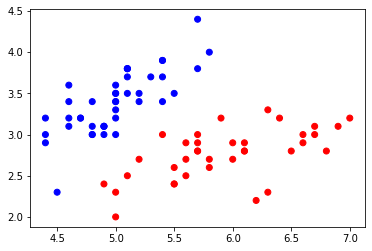

In [12]:
cm_pt=mpl.colors.ListedColormap(["blue","red"])
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)
plt.show()

### 属性中心化

In [13]:
x_train=x_train-np.mean(x_train,axis=0)

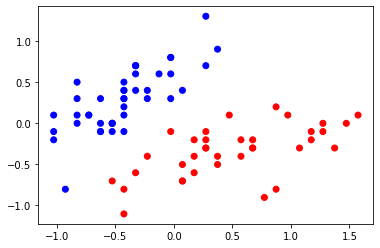

In [14]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)
plt.show()

### 生成多元模型的属性矩阵和标签列向量

In [15]:
x0_train=np.ones(num).reshape(-1,1)

In [16]:
X=tf.cast(tf.concat((x0_train,x_train),axis=1),tf.float32)
Y=tf.cast(y_train.reshape(-1,1),tf.float32)

In [17]:
X.shape,Y.shape

(TensorShape([78, 3]), TensorShape([78, 1]))

### 设置超参数

In [18]:
learn_rate=0.2
iter=120

display_step=30

### 设置模型参数初始值

In [19]:
np.random.seed(612)
W=tf.Variable(np.random.randn(3,1),dtype=tf.float32)

### 训练模型

In [20]:
ce=[]
acc=[]

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        PRED=1/(1+tf.exp(-tf.matmul(X,W)))
        Loss=-tf.reduce_mean(Y*tf.math.log(PRED)+(1-Y)*tf.math.log(1-PRED))
        
    accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED.numpy()<0.5,0.,1.),Y),tf.float32))
    ce.append(Loss)
    acc.append(accuracy)
    
    dL_dW=tape.gradient(Loss,W)
    W.assign_sub(learn_rate*dL_dW)
    
    if i % display_step==0:
        print("i:%i,Acc:%f,Loss:%f"%(i,accuracy,Loss))

i:0,Acc:0.230769,Loss:0.994269
i:30,Acc:0.961538,Loss:0.481892
i:60,Acc:0.987179,Loss:0.319128
i:90,Acc:0.987179,Loss:0.246626
i:120,Acc:1.000000,Loss:0.204982


### 可视化

### 绘制损失和准确率变化曲线

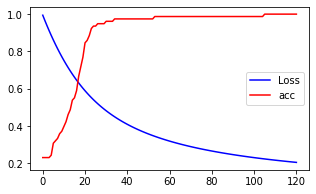

In [21]:
plt.figure(figsize=(5,3))
plt.plot(ce,color="blue",label="Loss")
plt.plot(acc,color="red",label="acc")
plt.legend()
plt.show()

### 绘制决策边界

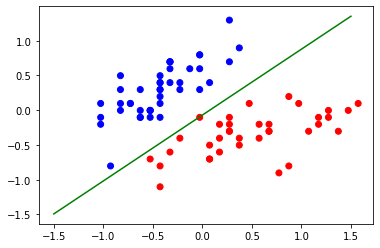

In [22]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)
x_=[-1.5,1.5]
y_=-(W[1]*x_+W[0])/W[2]
plt.plot(x_,y_,color="g")
plt.show()

### 在训练过程绘制决策边界

In [23]:
np.random.seed(612)
W=tf.Variable(np.random.randn(3,1),dtype=tf.float32)

In [24]:
cm_pt=mpl.colors.ListedColormap(["blue","red"])

In [25]:
x_=[-1.5,1.5]
y_=-(W[0]+W[1]*x_)/W[2]

### 训练模型

i:0,Acc:0.230769,Loss:0.994269
i:30,Acc:0.961538,Loss:0.481892
i:60,Acc:0.987179,Loss:0.319128
i:90,Acc:0.987179,Loss:0.246626
i:120,Acc:1.000000,Loss:0.204982


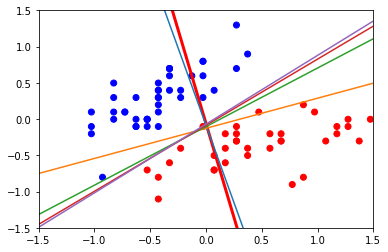

In [26]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)
plt.plot(x_,y_,color="red",linewidth=3)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

ce=[]
acc=[]
for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        PRED=1/(1+tf.exp(-tf.matmul(X,W)))
        Loss=-tf.reduce_mean(Y*tf.math.log(PRED)+(1-Y)*tf.math.log(1-PRED))
        
    accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED.numpy()<0.5,0.,1.),Y),tf.float32))
    ce.append(Loss)
    acc.append(accuracy)
    
    dL_dW=tape.gradient(Loss,W)
    W.assign_sub(learn_rate*dL_dW)
    
    if i % display_step==0:
        print("i:%i,Acc:%f,Loss:%f"%(i,accuracy,Loss))
        y_=-(W[0]+W[1]*x_)/W[2]
        plt.plot(x_,y_)

# 测试集

### 加载数据集

In [27]:
import tensorflow as tf
print("TensorFlow version:",tf.__version__)

TensorFlow version: 2.5.0-rc3


In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
TRAIN_URL="http://download.tensorflow.org/data/iris_training.csv"
train_path=tf.keras.utils.get_file(TRAIN_URL.split('/')[-1],TRAIN_URL)

TEST_URL="http://download.tensorflow.org/data/iris_test.csv"
test_path=tf.keras.utils.get_file(TEST_URL.split('/')[-1],TEST_URL)

In [30]:
df_iris_train=pd.read_csv(train_path,header=0)
df_iris_test=pd.read_csv(test_path,header=0)

In [31]:
iris_train=np.array(df_iris_train)
iris_test=np.array(df_iris_test)

In [32]:
iris_train.shape,iris_test.shape

((120, 5), (30, 5))

In [33]:
train_x=iris_train[:,0:2]
train_y=iris_train[:,4]

test_x=iris_test[:,0:2]
test_y=iris_test[:,4]

In [34]:
train_x.shape,train_y.shape

((120, 2), (120,))

In [35]:
test_x.shape,test_y.shape

((30, 2), (30,))

In [36]:
x_train=train_x[train_y<2]
y_train=train_y[train_y<2]

In [37]:
x_train.shape,y_train.shape

((78, 2), (78,))

In [38]:
x_test=test_x[test_y<2]
y_test=test_y[test_y<2]

In [39]:
x_test.shape,y_test.shape

((22, 2), (22,))

In [40]:
num_train=len(x_train)
num_test=len(x_test)

In [41]:
num_train,num_test

(78, 22)

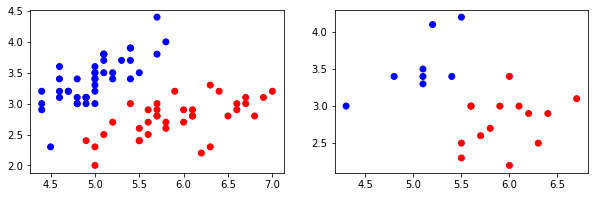

In [42]:
plt.figure(figsize=(10,3))
cm_pt=mpl.colors.ListedColormap(["blue","red"])

plt.subplot(121)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)

plt.subplot(122)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=cm_pt)

plt.show()

### 数据中心化

In [43]:
print(np.mean(x_train,axis=0))
print(np.mean(x_test,axis=0))

[5.42692308 3.1025641 ]
[5.62727273 3.06363636]


In [44]:
x_train=x_train-np.mean(x_train,axis=0)
x_test=x_test-np.mean(x_test,axis=0)

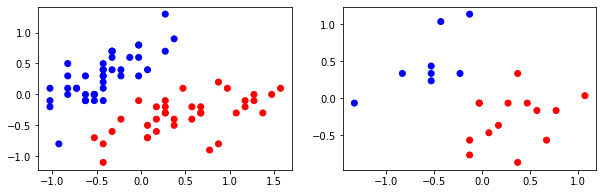

In [45]:
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)

plt.subplot(122)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=cm_pt)

plt.show()

In [46]:
x0_train=np.ones(num_train).reshape(-1,1)
X_train=tf.cast(tf.concat((x0_train,x_train),axis=1),dtype=tf.float32)
Y_train=tf.cast(y_train.reshape(-1,1),dtype=tf.float32)

In [47]:
X_train.shape,Y_train.shape

(TensorShape([78, 3]), TensorShape([78, 1]))

In [48]:
x0_test=np.ones(num_test).reshape(-1,1)
X_test=tf.cast(tf.concat((x0_test,x_test),axis=1),dtype=tf.float32)
Y_test=tf.cast(y_test.reshape(-1,1),dtype=tf.float32)

In [49]:
X_test.shape,Y_test.shape

(TensorShape([22, 3]), TensorShape([22, 1]))

### 设置超参数、模型处置

In [50]:
learn_rate=0.2
iter=120

display_step=30

In [51]:
np.random.seed(612)
W=tf.Variable(np.random.randn(3,1),dtype=tf.float32)

In [52]:
ce_train=[]
ce_test=[]
acc_train=[]
acc_test=[]

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        PRED_train=1/(1+tf.exp(-tf.matmul(X_train,W)))
        Loss_train=-tf.reduce_mean(Y_train*tf.math.log(PRED_train)+(1-Y_train)*tf.math.log(1-PRED_train))
        PRED_test=1/(1+tf.exp(-tf.matmul(X_test,W)))
        Loss_test=-tf.reduce_mean(Y_test*tf.math.log(PRED_test)+(1-Y_test)*tf.math.log(1-PRED_test))
        
    accuracy_train=tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED_train.numpy()<0.5,0.,1.),Y_train),tf.float32))
    accuracy_test=tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED_test.numpy()<0.5,0.,1.),Y_test),tf.float32))

    ce_train.append(Loss_train)
    ce_test.append(Loss_test)
    acc_train.append(accuracy_train)
    acc_test.append(accuracy_test)
    
    dL_dW=tape.gradient(Loss_train,W)
    W.assign_sub(learn_rate*dL_dW)
    
    if i % display_step==0:
        print("i:%i,TrainAcc:%f,TrainLoss:%f,TestAcc:%f,TestLoss:%f"%(i,accuracy_train,Loss_train,accuracy_test,Loss_test))

i:0,TrainAcc:0.230769,TrainLoss:0.994269,TestAcc:0.272727,TestLoss:0.939684
i:30,TrainAcc:0.961538,TrainLoss:0.481892,TestAcc:0.863636,TestLoss:0.505456
i:60,TrainAcc:0.987179,TrainLoss:0.319128,TestAcc:0.863636,TestLoss:0.362112
i:90,TrainAcc:0.987179,TrainLoss:0.246626,TestAcc:0.863636,TestLoss:0.295611
i:120,TrainAcc:1.000000,TrainLoss:0.204982,TestAcc:0.863636,TestLoss:0.256212


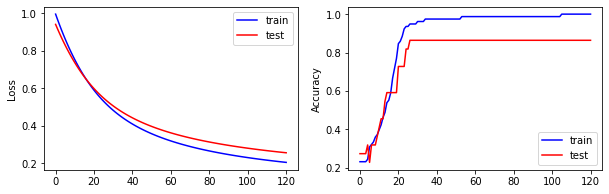

In [53]:
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.plot(ce_train,color="blue",label="train")
plt.plot(ce_test,color="red",label="test")
plt.ylabel("Loss")
plt.legend()

plt.subplot(122)
plt.plot(acc_train,color="blue",label="train")
plt.plot(acc_test,color="red",label="test")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

# 绘制分类图

### 生成网格坐标矩阵np.meshgrid()

### 填充网格：plt.pcolomesh()

In [54]:
import tensorflow as tf
print("TensorFlow version:",tf.__version__)

TensorFlow version: 2.5.0-rc3


In [55]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

<ipython-input-58-a4028c0302f2>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,Z,cmap="rainbow")


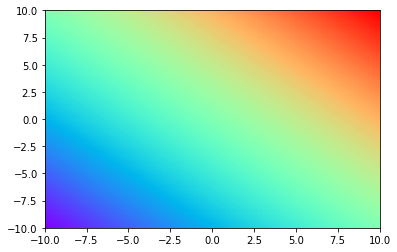

In [58]:
n=200

x=np.linspace(-10,10,n)
y=np.linspace(-10,10,n)

X,Y=np.meshgrid(x,y)
Z=X+Y

plt.pcolormesh(X,Y,Z,cmap="rainbow")

plt.show()

<ipython-input-62-f7bdff2dacd0>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,Z,cmap=cm_bg)


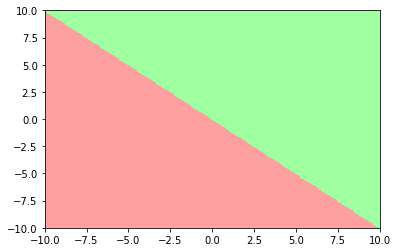

In [62]:
n=200

x=np.linspace(-10,10,n)
y=np.linspace(-10,10,n)

X,Y=np.meshgrid(x,y)
Z=X+Y

cm_bg=mpl.colors.ListedColormap(["#FFA0A0","#A0FFA0"])
plt.pcolormesh(X,Y,Z,cmap=cm_bg)

plt.show()

<ipython-input-64-3129c0a79f13>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,Z,cmap=cm_bg)


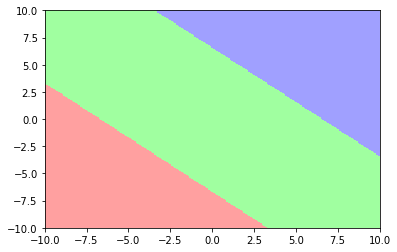

In [64]:
n=200

x=np.linspace(-10,10,n)
y=np.linspace(-10,10,n)

X,Y=np.meshgrid(x,y)
Z=X+Y

cm_bg=mpl.colors.ListedColormap(["#FFA0A0","#A0FFA0","#A0A0FF"])
plt.pcolormesh(X,Y,Z,cmap=cm_bg)

plt.show()

### 绘制轮廓线plt.contour()


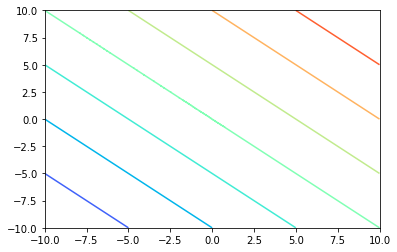

In [65]:
n=200

x=np.linspace(-10,10,n)
y=np.linspace(-10,10,n)

X,Y=np.meshgrid(x,y)
Z=X+Y

plt.contour(X,Y,Z,cmap="rainbow")

plt.show()

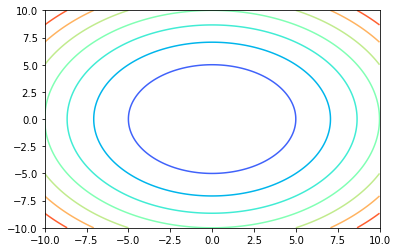

In [66]:
n=200

x=np.linspace(-10,10,n)
y=np.linspace(-10,10,n)

X,Y=np.meshgrid(x,y)
Z=X**2+Y**2

plt.contour(X,Y,Z,cmap="rainbow")

plt.show()

### 填充分区plt.contourf()

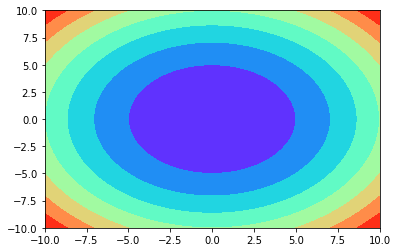

In [67]:
n=200

x=np.linspace(-10,10,n)
y=np.linspace(-10,10,n)

X,Y=np.meshgrid(x,y)
Z=X**2+Y**2

plt.contourf(X,Y,Z,cmap="rainbow")

plt.show()

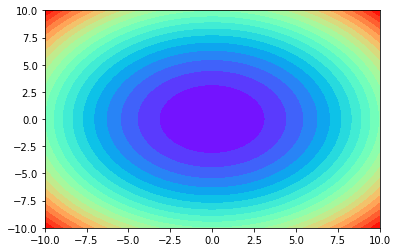

In [70]:
n=200

x=np.linspace(-10,10,n)
y=np.linspace(-10,10,n)

X,Y=np.meshgrid(x,y)
Z=X**2+Y**2

plt.contourf(X,Y,Z,20,cmap="rainbow")#20:颜色分区的数量

plt.show()

### 生成网格坐标矩阵：np.meshgrid()
### 绘制分类图：pcolormesh()/plt.contourf()

<ipython-input-71-62ead0fc2ed1>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,Z,cmap=cm_bg)


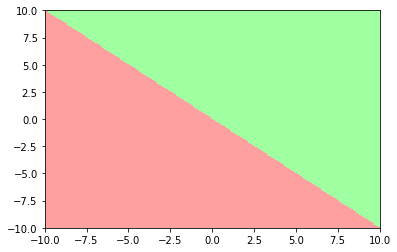

In [71]:
n=200

x=np.linspace(-10,10,n)
y=np.linspace(-10,10,n)

X,Y=np.meshgrid(x,y)
Z=X+Y

cm_bg=mpl.colors.ListedColormap(["#FFA0A0","#A0FFA0"])
Z=tf.where(Z<0,0,1)
plt.pcolormesh(X,Y,Z,cmap=cm_bg)

plt.show()

<ipython-input-72-39955d802cc9>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,Z,cmap=cm_bg)


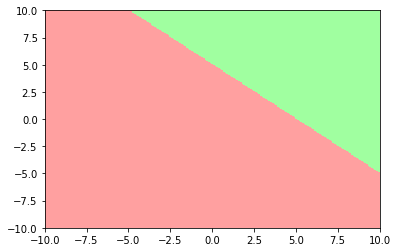

In [72]:
n=200

x=np.linspace(-10,10,n)
y=np.linspace(-10,10,n)

X,Y=np.meshgrid(x,y)
Z=X+Y

cm_bg=mpl.colors.ListedColormap(["#FFA0A0","#A0FFA0"])
Z=tf.where(Z<5,0,1)
plt.pcolormesh(X,Y,Z,cmap=cm_bg)

plt.show()

### 根据鸢尾花分类模型，绘制分类图

In [73]:
M=300
x1_min,x2_min=x_train.min(axis=0)
x1_max,x2_max=x_train.max(axis=0)
t1=np.linspace(x1_min,x1_max,M)
t2=np.linspace(x2_min,x2_max,M)
m1,m2=np.meshgrid(t1,t2)

In [76]:
m0=np.ones(M*M)
X_mesh=tf.cast(np.stack((m0,m1.reshape(-1),m2.reshape(-1)),axis=1),dtype=tf.float32)
Y_mesh=tf.cast(1/(1+tf.exp(-tf.matmul(X_mesh,W))),dtype=tf.float32)
Y_mesh=tf.where(Y_mesh<0.5,0,1)

In [77]:
n=tf.reshape(Y_mesh,m1.shape)

<ipython-input-79-270a0abec04b>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(m1,m2,n,cmap=cm_bg)


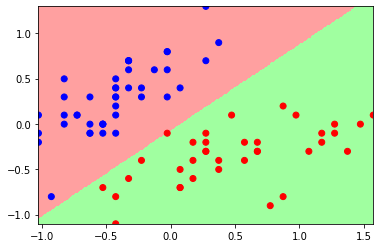

In [79]:
cm_pt=mpl.colors.ListedColormap(["blue","red"])
cm_bg=mpl.colors.ListedColormap(["#FFA0A0","#A0FFA0"])

plt.pcolormesh(m1,m2,n,cmap=cm_bg)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)

plt.show()

In [80]:
M=300
x1_min,x2_min=x_test.min(axis=0)
x1_max,x2_max=x_test.max(axis=0)
t1=np.linspace(x1_min,x1_max,M)
t2=np.linspace(x2_min,x2_max,M)
m1,m2=np.meshgrid(t1,t2)

In [81]:
m0=np.ones(M*M)
X_mesh=tf.cast(np.stack((m0,m1.reshape(-1),m2.reshape(-1)),axis=1),dtype=tf.float32)
Y_mesh=tf.cast(1/(1+tf.exp(-tf.matmul(X_mesh,W))),dtype=tf.float32)
Y_mesh=tf.where(Y_mesh<0.5,0,1)

In [82]:
n=tf.reshape(Y_mesh,m1.shape)

<ipython-input-83-cd17493f21c5>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(m1,m2,n,cmap=cm_bg)


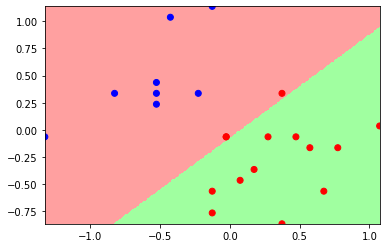

In [83]:
plt.pcolormesh(m1,m2,n,cmap=cm_bg)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=cm_pt)

plt.show()